In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import (Descriptors,
    Lipinski, QED, Draw, AllChem)
import json
from kinfraglib import utils
import matplotlib.pyplot as plt
import seaborn as sns
import utils_eval

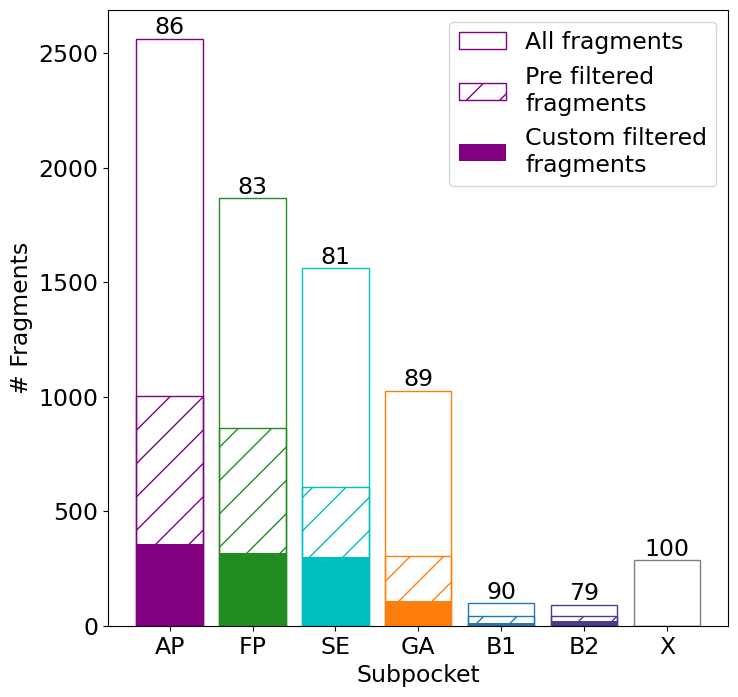

In [68]:
# inspired by KinFragLib 

n_fragments_per_subpocket = [2561, 1866, 1560, 1024, 98, 92, 285]
n_fragments_per_subpocket_pre_filtered = [1001, 862, 606, 306, 42, 42, 0]
n_fragments_per_subpocket_filtered = [358, 316, 300, 110, 10, 19, 0]

SUBPOCKET_COLORS = {
    "AP": "purple",
    "FP": "forestgreen",
    "SE": "c",
    "GA": "tab:orange",
    "B1": "tab:blue",
    "B2": "darkslateblue",
    "X": "grey",
}


plt.figure(figsize=(8, 8))
ax1 = plt.bar(
    SUBPOCKET_COLORS.keys(),
    n_fragments_per_subpocket,
    fill=False,
    edgecolor=SUBPOCKET_COLORS.values(),
)
ax2 = plt.bar(
    SUBPOCKET_COLORS.keys(),
    n_fragments_per_subpocket_pre_filtered,
    edgecolor=SUBPOCKET_COLORS.values(),
    hatch="/",
    fill=False
)
ax3 = plt.bar(
    SUBPOCKET_COLORS.keys(),
    n_fragments_per_subpocket_filtered,
    color=SUBPOCKET_COLORS.values(),
)
plt.legend(["All fragments", "Pre filtered\nfragments", "Custom filtered\nfragments"], fontsize=17)
plt.ylabel("# Fragments", fontsize=17)
plt.xlabel("Subpocket", fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Add percentages to bars
bars = ax1.patches
bar_labels = [
    str(int(round((i - j) / i * 100, 0)))
    for i, j in zip(n_fragments_per_subpocket, n_fragments_per_subpocket_filtered)
]
for bar, label in zip(bars, bar_labels):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        label,
        ha="center",
        va="bottom",
        fontsize=17,
        color="black",
    )